In [1]:
import numpy as np
import pandas as pd 
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
import json

# 1 - Cleanup of the database for the Exploratory Data Analysis

In [2]:
df = pd.read_csv("Clementine - Data.csv", encoding='utf-16', sep='\t') 

In [3]:
len(df.index)

202055

### 1.1 - Adding time values

In [4]:
df['Created At'] = pd.to_datetime(df['Created At'])
df['hour'] = df['Created At'].dt.hour
df['dayofweek'] = df['Created At'].dt.dayofweek
#df['minute'] = df['Created At'].dt.minute
#df['day'] = df['Created At'].dt.day
#df['month'] = df['Created At'].dt.month
#df['year'] = df['Created At'].dt.year

### 1.2 - Adding distances

In [5]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [6]:
df['distance'] = haversine(df['Origin Latitude'],df['Origin Longitude'],df['Arrival Latitude'],df['Arrival Longitude'])

### 1.3 - Adding cities

In [7]:
cities = ['Paris','Jouy-le-Châtel','Lesches','Saint-Germain-sous-Doue','Juilly','Chapelles-Bourbon','Marcilly','Guérard','Bassevelle','Champcenest','Germigny-lÉvêque','Conches-sur-Gondoire','Dammartin-sur-Tigeaux','Montdauphin','Annet-sur-Marne','Émerainville','Aufferville','Nangis','Chauffry','Limoges-Fourches','Noisy-sur-École','Isles-les-Meldeuses','Varreddes','Vendrest','Darvault','Saint-Léger','Mary-sur-Marne','Jaignes','Avon','Carnetin','Aubepierre-Ozouer-le-Repos','La Chapelle-Gauthier','Paley','Saint-Germain-Laxis','Sept-Sorts','La Celle-sur-Morin','Gouaix','La Haute-Maison','Chauconin-Neufmontiers','Pontcarré','Ocquerre','Touquin','Mauregard','Faÿ-lès-Nemours','Beaumont-du-Gâtinais','Chalifert','Obsonville','Montceaux-lès-Provins','Nanteuil-lès-Meaux','Blennes','Montceaux-lès-Meaux','Tigeaux','Noisy-Rudignon','Pommeuse','Voulx','Beton-Bazoches','Saint-Germain-Laval','Coutevroult','Châtenoy','La Chapelle-Moutils','La Trétoire','Grez-sur-Loing','Doue','Cély','Magny-le-Hongre','Chevry-en-Sereine','Lieusaint','Gretz-Armainvilliers','La Genevraye','Armentières-en-Brie','Meigneux','Maincy','Trilport','Cocherel','Beauvoir','Vignely','Dhuisy','Perthes','Chambry','Vernou-la-Celle-sur-Seine','Saint-Thibault-des-Vignes','Sammeron','Voinsles','Paroy','Saint-Hilliers','Gravon','Mortery','Villemer','Quincy-Voisins','Coulommes','Chevry-Cossigny','Le Mesnil-Amelot','Montry','Châtenay-sur-Seine','Augers-en-Brie','Jaulnes','Congis-sur-Thérouanne','Saint-Sauveur-lès-Bray','Saint-Ange-le-Viel','Thénisy','Larchant','Fontaine-le-Port','Forfry','Montenils','Oissery','Écrennes','Moissy-Cramayel','Poligny','Vert-Saint-Denis','Courtacon','Amponville','Gouvernes','Jouy-sur-Morin','Nanteau-sur-Lunain','Chenou','Crisenoy','Servon','Guermantes','Champeaux','Lorrez-le-Bocage-Préaux','Soisy-Bouy','Remauville','Longueville','Jutigny','Saint-Mammès','Montgé-en-Goële','Hermé','Boissy-le-Châtel','Lagny-sur-Marne','Chanteloup-en-Brie','Villemaréchal','Orly-sur-Morin','Dagny','Courchamp','Chartrettes','Vimpelles','Valence-en-Brie','Ury','Ormesson','Tousson','Savins','Saint-Pierre-lès-Nemours','Bréau','Laval-en-Brie','Dampmart','Couilly-Pont-aux-Dames','Claye-Souilly','Chalautre-la-Petite','Champdeuil','Boissise-la-Bertrand','Bois-le-Roi','Passy-sur-Seine','Neufmoutiers-en-Brie','Soignolles-en-Brie','Champs-sur-Marne','Villeroy','Hautefeuille','Presles-en-Brie','Sourdun','Sablonnières','Précy-sur-Marne','Sainte-Aulde','Gastins','Thoury-Férottes','Pomponne','Villeneuve-les-Bordes','Égreville','Brou-sur-Chantereine','Sancy-lès-Provins','Saint-Germain-sur-Morin','Ormes-sur-Voulzie','Bazoches-lès-Bray','Le Vaudoué','Cucharmoy','Crouy-sur-Ourcq','Cessoy-en-Montois','Esbly','La Chapelle-Iger','Noyen-sur-Seine','Jouarre','Chelles','Saint-Mard','Crécy-la-Chapelle','Torcy','Mauperthuis','Vaudoy-en-Brie','Sognolles-en-Montois','Pézarches','Chalautre-la-Grande','Rupéreux','Dammarie-les-Lys','Roissy-en-Brie','Rozay-en-Brie','Saint-Sauveur-sur-École','Le Plessis-aux-Bois','Fontainebleau','Sainte-Colombe','Varennes-sur-Seine','Lumigny-Nesles-Ormeaux','Treuzy-Levelay','Baby','Garentreville','Mareuil-lès-Meaux','Moussy-le-Neuf','Trilbardou','Meaux','Bombon','Thomery','Courtomer','Nemours','Saint-Méry','Saint-Rémy-la-Vanne','Bray-sur-Seine','Mortcerf','Courquetaine','Rouvres','Brie-Comte-Robert','Bernay-Vilbert','Fouju','Bouleurs','Othis','Boissise-le-Roi','Villeneuve-Saint-Denis','Fontenailles','Marchémoret','Mons-en-Montois','Voulton','Tancrou','Compans','Vaires-sur-Marne','Saint-Loup-de-Naud','Lizines','Moisenay','Mousseaux-lès-Bray','Penchard','Buthiers','Voisenon','Clos-Fontaine','Seine-Port','Gironville','Châtres','Ville-Saint-Jacques','Montereau-Fault-Yonne','Châtillon-la-Borde','Boisdon','Hondevilliers','Vanvillé','Quiers','Bailly-Romainvilliers','Choisy-en-Brie','Chaumes-en-Brie','Combs-la-Ville','Jossigny','Fresnes-sur-Marne','Vulaines-sur-Seine','Rouilly','Pontault-Combault','Salins','Balloy','Villemareuil','Burcy','Guignes','Dammartin-en-Goële','Pamfou','Montarlot','Saint-Cyr-sur-Morin','Melz-sur-Seine','Villevaudé','Flagy','Saint-Siméon','Ichy','Jablines','Rumont','Boutigny','Guercheville','Fontaine-Fourches','Donnemarie-Dontilly','Sancy','Saint-Ouen-en-Brie','Diant','Boissettes','Chalmaison','Maisoncelles-en-Brie','Crégy-lès-Meaux','Saint-Martin-des-Champs','Saint-Augustin','Courpalay','Saints','Épisy','Saint-Mesmes','Maisoncelles-en-Gâtinais','Charmentray','Marêts','Esmans','Coulommiers','Montolivet','Faremoutiers','La Brosse-Montceaux','Forges','La Ferté-Gaucher','Fleury-en-Bière','Villenauxe-la-Petite','Aulnoy','Lescherolles','Bellot','Champagne-sur-Seine','Férolles-Attilly','Meilleray','Vaux-le-Pénil','Marles-en-Brie','Beauchery-Saint-Martin','Sigy','Cesson','Chailly-en-Bière','Vincy-Manœuvre','Saint-Germain-sur-École','Léchelle','Barbizon','Crèvecœur-en-Brie','Vaux-sur-Lunain','Coutençon','Château-Landon','Villiers-en-Bière','Pringy','Ozoir-la-Ferrière','Tournan-en-Brie','Saint-Just-en-Brie','Boulancourt','Noisiel','Chevrainvilliers','Rampillon','Barcy','Villuis','Achères-la-Forêt','Arbonne-la-Forêt','La Houssaye-en-Brie','Montigny-Lencoup','Mondreville','Saint-Soupplets','Méry-sur-Marne','Giremoutiers','Bagneaux-sur-Loing','Héricy','Messy','Cerneux','Thieux','Mouroux','Argentières','La Rochette','Souppes-sur-Loing','Frétoy','Signy-Signets','Lognes','Favières','Saint-Brice','Bougligny','Changis-sur-Marne','La Chapelle-la-Reine','Courcelles-en-Bassée','Bannost-Villegagnon','Solers','Villeneuve-sur-Bellot','Évry-Grégy-sur-Yerre','Cuisy','Égligny','Chevru','Fromont','Chamigny','Villebéon','Poincy','Moret-sur-Loing','Germigny-sous-Coulombs','Provins','Ferrières-en-Brie','Bransles','Réau','La Chapelle-Rablais','Misy-sur-Yonne','Pécy','Le Plessis-Feu-Aussoux','Andrezel','Condé-Sainte-Libiaire','Villiers-sur-Morin','Villenoy','Everly','Recloses','La Chapelle-Saint-Sulpice','La Ferté-sous-Jouarre','Vaucourtois','Reuil-en-Brie','Thorigny-sur-Marne','Bussy-Saint-Georges','Poigny','Bourron-Marlotte','Montigny-le-Guesdier','Montereau-sur-le-Jard','Vulaines-lès-Provins','Villiers-sur-Seine','Saint-Denis-lès-Rebais','Gressy','Grisy-sur-Seine','Fontains','Mouy-sur-Seine','Montmachoux','Cannes-Écluse','Montcourt-Fromonville','Longperrier','Boissy-aux-Cailles','Saint-Fiacre','Marolles-en-Brie','Échouboulains','Voulangis','Marolles-sur-Seine','Grisy-Suisnes','Lissy','Fontenay-Trésigny','Nandy','Amillis','Coulombs-en-Valois','Chaintreaux','Blandy','Le Pin','Saâcy-sur-Marne','Beautheil','Melun','Gurcy-le-Châtel','Gesvres-le-Chapitre','Savigny-le-Temple','Serris','Leudon-en-Brie','Saint-Mars-Vieux-Maisons','Samoreau','Chartronges','Le Mée-sur-Seine','Bussières','Collégien','Moussy-le-Vieux','La Grande-Paroisse','Yèbles','Nonville','Veneux-les-Sablons','Liverdy-en-Brie','Barbey','La Madeleine-sur-Loing','Montigny-sur-Loing','Saint-Barthélemy','Puisieux','Livry-sur-Seine','Coupvray','Douy-la-Ramée','Dormelles','Saint-Fargeau-Ponthierry','Lizy-sur-Ourcq','Saint-Pathus','Trocy-en-Multien','Grandpuits-Bailly-Carrois','Charny','Bezalles','Monthyon','Citry','Ozouer-le-Voulgis','Étrépilly','Mitry-Mory','Iverny','Isles-lès-Villenoy','Villeneuve-sous-Dammartin','Nanteuil-sur-Marne','Samois-sur-Seine','Le Plessis-Placy','Vieux-Champagne','Pierre-Levée','Saint-Ouen-sur-Morin','Châteaubleau','Sivry-Courtry','Luzancy','Rubelles','Chessy','Montévrain','Le Châtelet-en-Brie','Luisetaines','Mormant','Verdelot','Machault','May-en-Multien','Villeneuve-le-Comte','Villeparisis','Arville','La Croix-en-Brie','Boitron','Écuelles','Courtry','Saint-Martin-du-Boschet','Coubert','Le Plessis-lÉvêque','Verneuil-lÉtang','Chailly-en-Brie','Fublaines','Louan-Villegruis-Fontaine','Chenoise','Villiers-sous-Grez','Bussy-Saint-Martin','Saint-Jean-les-Deux-Jumeaux','Croissy-Beaubourg','Rebais','Maison-Rouge','La Tombe','Nantouillet','Ussy-sur-Marne','Lésigny','Villecerf','Nanteau-sur-Essonne','Féricy','Vinantes','Villiers-Saint-Georges','Saint-Martin-en-Bière','Chanteloup-les-Vignes','Vieille-Église-en-Yvelines','Sainte-Mesme','Chambourcy','Chaufour-lès-Bonnières','Le Tertre-Saint-Denis','Bréviaires','Boissy-Mauvoisin','Condé-sur-Vesgre','Boinville-en-Mantois','Orcemont','Rennemoulin','Adainville','Oinville-sur-Montcient','Bazainville','Meulan-en-Yvelines','Rambouillet','Marcq','Montesson','Le Tartre-Gaudran','Le Vésinet','Maisons-Laffitte','Bailly','Maurepas','Tessancourt-sur-Aubette','Saint-Léger-en-Yvelines','Montchauvet','Béhoust','La Falaise','Feucherolles','Goussonville','Orsonville','Villiers-le-Mahieu','Galluis','Moisson','Dannemarie','Brueil-en-Vexin','Allainville','Cernay-la-Ville','La Celle-les-Bordes','Bourdonné','Soindres','Jeufosse','Évecquemont','Houilles','Gazeran','Flexanville','Bréval','Nézel','Hargeville','Breuil-Bois-Robert','Boinville-le-Gaillard','Le Port-Marly','Richebourg','Civry-la-Forêt','Guerville','Bonnières-sur-Seine','Mureaux','Fourqueux','Émancé','Villiers-Saint-Frédéric','Sartrouville','Rosay','Coignières','La Verrière','Aulnay-sur-Mauldre','Croissy-sur-Seine','Médan','Tacoignières','Saint-Martin-de-Bréthencourt','Saint-Lambert','Paray-Douaville','Montainville','Porcheville','Jouy-Mauvoisin','Bois-dArcy','Flacourt','Triel-sur-Seine','Lainville-en-Vexin','Autouillet','Lévis-Saint-Nom','Courgent','Ecquevilly','Morainvilliers','Ménerville','Achères','Neauphlette','Freneuse','Mareil-Marly','Bennecourt','Boinvilliers','Bouafle','Mareil-le-Guyon','Carrières-sous-Poissy','Orphin','Saint-Nom-la-Bretèche','Fontenay-Saint-Père','Perdreauville','Follainville-Dennemont','Blaru','Auffreville-Brasseuil','Millemont','Poissy','Arnouville-lès-Mantes','Essarts-le-Roi','Prunay-en-Yvelines','Marly-le-Roi','Boissets','Davron','Carrières-sur-Seine','Sailly','Buchelay','Longnes','Grandchamp','Saint-Illiers-le-Bois','Gambais','Ablis','Verneuil-sur-Seine','Tilly','Mézy-sur-Seine','Saint-Germain-de-la-Grange','Andrésy','Loges-en-Josas','Épône','Bazoches-sur-Guyonne','Jambville','Montfort-lAmaury','Hermeray','Plaisir','Magny-les-Hameaux','Mulcent','Mousseaux-sur-Seine','Mantes-la-Ville','La Queue-les-Yvelines','Gargenville','Jumeauville','La Villeneuve-en-Chevrie','Flins-Neuve-Église','Mézières-sur-Seine','Choisel','Limetz-Villez','Goupillières','LÉtang-la-Ville','Mondreville','Mareil-sur-Mauldre','Gressey','Port-Villez','Rosny-sur-Seine','Chavenay','Saint-Rémy-lHonoré','Vicq','Saint-Cyr-lÉcole','Maulette','La Boissière-École','Neauphle-le-Vieux','Bonnelles','Orgerus','Garancières','Versailles','Vaux-sur-Seine','Gambaiseuil','Guyancourt','Buc','Bullion','Chatou','Auffargis','Guernes','Trappes','Gommecourt','Thoiry','Sonchamp','Toussus-le-Noble','Vernouillet','Alluets-le-Roi','Favrieux','Fontenay-le-Fleury','Crespières','Le Chesnay','Méricourt','Beynes','Bougival','Rocquencourt','Louveciennes','Guitrancourt','Drocourt','Magnanville','Maule','Mesnuls','Conflans-Sainte-Honorine','Flins-sur-Seine','Septeuil','Raizeux','Boissy-sans-Avoir','Prunay-le-Temple','Mantes-la-Jolie','Dammartin-en-Serve','Bazemont','Milon-la-Chapelle','Saint-Germain-en-Laye','Montalet-le-Bois','Aubergenville','Voisins-le-Bretonneux','Poigny-la-Forêt','Orvilliers','Mittainville','Maurecourt','Clayes-sous-Bois','Cravent','Le Pecq','Le Perray-en-Yvelines','Neauphle-le-Château','Auteuil','Villepreux','Osmoy','Montigny-le-Bretonneux','Noisy-le-Roi','Élancourt','Vert','Herbeville','Saint-Forget','Jouy-en-Josas','Juziers','Longvilliers','Hardricourt','Saint-Illiers-la-Ville','Gaillon-sur-Montcient','Viroflay','Villennes-sur-Seine','Orgeval','Limay','Jouars-Pontchartrain','Senlisse','Fontenay-Mauvoisin','Le Mesnil-le-Roi','Chevreuse','Saint-Martin-la-Garenne','La Celle-Saint-Cloud','Thiverval-Grignon','Le Tremblay-sur-Mauldre','Vélizy-Villacoublay','Dampierre-en-Yvelines','Saint-Hilarion','Clairefontaine-en-Yvelines','Aigremont','Méré','Grosrouvre','Le Mesnil-Saint-Denis','Saint-Martin-des-Champs','Rolleboise','Issou','Lommoye','Saulx-Marchais','La Hauteville','Saint-Rémy-lès-Chevreuse','Houdan','Saint-Arnoult-en-Yvelines','Rochefort-en-Yvelines','Châteaufort','Ponthévrard','Villette','Chapet','Andelu','Janvry','Brunoy','Boissy-sous-Saint-Yon','Villebon-sur-Yvette','Monnerville','Gironville-sur-Essonne','Saint-Hilaire','Évry','Leudeville','Valpuiseaux','Dourdan','Estouches','Draveil','Marolles-en-Beauce','Mennecy','Grigny','Vert-le-Petit','Oncy-sur-École','Guillerval','Wissous','Vayres-sur-Essonne','Abbéville-la-Rivière','Avrainville','Ris-Orangis','Bures-sur-Yvette','Palaiseau','Arpajon','Guigneville-sur-Essonne','Épinay-sur-Orge','Blandy','Boussy-Saint-Antoine','Villabé','La Ville-du-Bois','Angervilliers','Écharcon','Ormoy','Cerny','Verrières-le-Buisson','Boissy-le-Cutté','Crosne','Moigny-sur-École','Longpont-sur-Orge','Mondeville','Saint-Michel-sur-Orge','Ballainvilliers','Villejust','Saint-Escobille','Saint-Pierre-du-Perray','Mérobert','Ballancourt-sur-Essonne','Maisse','Chamarande','Milly-la-Forêt','Breux-Jouy','Le Plessis-Pâté','Auvers-Saint-Georges','Auvernaux','Morsang-sur-Seine','Vigneux-sur-Seine','Champcueil','Courcouronnes','Boigneville','Étréchy','Authon-la-Plaine','Boissy-la-Rivière','Saintry-sur-Seine','Montlhéry','Fleury-Mérogis','Saint-Sulpice-de-Favières','Varennes-Jarcy','Videlles','Quincy-sous-Sénart','Orveau','Granges-le-Roi','Gometz-le-Châtel','Boutigny-sur-Essonne','Méréville','Boutervilliers','Mauchamps','Igny','Viry-Châtillon','Bouville','Étampes','Gometz-la-Ville','Arrancourt','Bièvres','DHuison-Longueville','Chatignonville','Dannemois','Chevannes','Forges-les-Bains','Angerville','Corbeil-Essonnes','Le Val-Saint-Germain','Puiselet-le-Marais','Bois-Herpin','Orsay','Tigery','Fontenay-le-Vicomte','Massy','La Ferté-Alais','Yerres','Paray-Vieille-Poste','Saint-Germain-lès-Arpajon','Saint-Maurice-Montcouronne','Gif-sur-Yvette','Pussay','Morangis','Villiers-sur-Orge','La Forêt-Sainte-Croix','Guibeville','Chilly-Mazarin','Champmotteux','Bouray-sur-Juine','Soisy-sur-École','Souzy-la-Briche','La Norville','Épinay-sous-Sénart','Brières-les-Scellés','Nainville-les-Roches','Ulis','Athis-Mons','Leuville-sur-Orge','Soisy-sur-Seine','Fontenay-lès-Briis','Saint-Cyr-la-Rivière','Lisses','Baulne','Briis-sous-Forges','Nozay','Ormoy-la-Rivière','Champlan','Roinvilliers','Richarville','Courson-Monteloup','Congerville-Thionville','Marcoussis','Boullay-les-Troux','La Forêt-le-Roi','Vaugrigneuse','Janville-sur-Juine','Étiolles','Linas','Saclas','Chauffour-lès-Étréchy','Saint-Jean-de-Beauregard','Morsang-sur-Orge','Juvisy-sur-Orge','Chalo-Saint-Mars','Vauhallan','Chalou-Moulineux','Vert-le-Grand','Montgeron','Saulx-les-Chartreux','Pecqueuse','Corbreuse','Brétigny-sur-Orge','Boissy-le-Sec','Villemoisson-sur-Orge','Saint-Chéron','Bondoufle','Le Coudray-Montceaux','Roinville','Brouy','Saint-Vrain','Sermaise','Saint-Aubin','Villeneuve-sur-Auvers','Saclay','Égly','Morigny-Champigny','Prunay-sur-Essonne','Saint-Germain-lès-Corbeil','Buno-Bonnevaux','Torfou','Fontaine-la-Rivière','Itteville','Breuillet','Villiers-le-Bâcle','Cheptainville','Lardy','Marolles-en-Hurepoix','Villeconin','Sainte-Geneviève-des-Bois','Bruyères-le-Châtel','Savigny-sur-Orge','Saint-Cyr-sous-Dourdan','Ollainville','Mespuits','Plessis-Saint-Benoist','Courdimanche-sur-Essonne','Courances','Limours','Molières','Longjumeau','Saint-Yon','Neuilly-sur-Seine','Châtillon','Bois-Colombes','Puteaux','Clamart','Meudon','Marnes-la-Coquette','Issy-les-Moulineaux','Vaucresson','Rueil-Malmaison','Antony','Le Plessis-Robinson','Levallois-Perret','Boulogne-Billancourt','Asnières-sur-Seine','Colombes','Fontenay-aux-Roses','Garches','Villeneuve-la-Garenne','Courbevoie','Montrouge','Châtenay-Malabry','Clichy','Vanves','Ville-dAvray','Suresnes','Sèvres','Sceaux','Chaville','La Garenne-Colombes','Gennevilliers','Nanterre','Saint-Cloud','Malakoff','Bagneux','Bourg-la-Reine','Le Bourget','Bagnolet','La Courneuve','Pavillons-sous-Bois','Sevran','Villemomble','Montreuil','Livry-Gargan','Aulnay-sous-Bois','Dugny','Coubron','Villetaneuse','Le Raincy','Saint-Denis','Lilas','Clichy-sous-Bois','Noisy-le-Grand','Romainville','Aubervilliers','Noisy-le-Sec','Villepinte','Bobigny','Pierrefitte-sur-Seine','Tremblay-en-France','Vaujours','Montfermeil','LÎle-Saint-Denis','Le Pré-Saint-Gervais','Stains','Pantin','Neuilly-Plaisance','Rosny-sous-Bois','Saint-Ouen','Gournay-sur-Marne','Bondy','Épinay-sur-Seine','Neuilly-sur-Marne','Drancy','Le Blanc-Mesnil','Gagny','Fontenay-sous-Bois','Santeny','LHaÿ-les-Roses','Limeil-Brévannes','Alfortville','Le Plessis-Trévise','Choisy-le-Roi','Saint-Mandé','Fresnes','Villiers-sur-Marne','Le Kremlin-Bicêtre','Boissy-Saint-Léger','La Queue-en-Brie','Ormesson-sur-Marne','Arcueil','Marolles-en-Brie','Villecresnes','Le Perreux-sur-Marne','Valenton','Nogent-sur-Marne','Cachan','Saint-Maur-des-Fossés','Rungis','Thiais','Sucy-en-Brie','Mandres-les-Roses','Vincennes','Charenton-le-Pont','Saint-Maurice','Bry-sur-Marne','Bonneuil-sur-Marne','Joinville-le-Pont','Ablon-sur-Seine','Noiseau','Gentilly','Villejuif','Vitry-sur-Seine','Chevilly-Larue','Chennevières-sur-Marne','Périgny','Champigny-sur-Marne','Ivry-sur-Seine','Maisons-Alfort','Orly','Villeneuve-le-Roi','Villeneuve-Saint-Georges','Créteil','Baillet-en-France','Osny','Hodent','Montreuil-sur-Epte','Cergy','Chennevières-lès-Louvres','Montlignon','Fontenay-en-Parisis','Ézanville','Neuville-sur-Oise','Sagy','Théméricourt','Butry-sur-Oise','Le Plessis-Luzarches','Jouy-le-Moutier','Mareil-en-France','Bréançon','Chaussy','Vallangoujard','Magny-en-Vexin','Bellefontaine','Haravilliers','Survilliers','Le Heaulme','Courcelles-sur-Viosne','Brignancourt','Seraincourt','Vémars','Domont','Bonneuil-en-France','Montmorency','Bruyères-sur-Oise','Épiais-lès-Louvres','Montgeroult','Margency','Pontoise','Menouville','Cléry-en-Vexin','Commeny','Épiais-Rhus','Vauréal','Bray-et-Lû','Marly-la-Ville','Le Perchay','Génicourt','Amenucourt','Condécourt','Groslay','Menucourt','Saint-Witz','Piscop','Nucourt','Arronville','Herblay','Asnières-sur-Oise','Presles','Lassy','Andilly','Haute-Isle','Chaumontel','Villaines-sous-Bois','Ermont','Auvers-sur-Oise','Saint-Brice-sous-Forêt','Arthies','Grisy-les-Plâtres','Puiseux-en-France','Goussainville','Moussy','Pierrelaye','Franconville','Louvres','Gouzangrez','Le Bellay-en-Vexin','Gonesse','La Chapelle-en-Vexin','Hédouville','Villers-en-Arthies','Saint-Martin-du-Tertre','Seugy','Roissy-en-France','Boissy-lAillerie','La Frette-sur-Seine','Wy-dit-Joli-Village','Deuil-la-Barre','Bezons','Courdimanche','Ronquerolles','Saint-Gratien','Bernes-sur-Oise','Nesles-la-Vallée','Chars','Viarmes','Neuilly-en-Vexin','Taverny','Bessancourt','Vigny','Ableiges','Beaumont-sur-Oise','Theuville','Saint-Clair-sur-Epte','Vienne-en-Arthies','Cormeilles-en-Parisis','Labbeville','Livilliers','Charmont','Bouffémont','Berville','Sannois','Villeron','Écouen','Saint-Cyr-en-Arthies','Saint-Prix','Ennery','Saint-Leu-la-Forêt','Attainville','Belloy-en-France','Frouville','Champagne-sur-Oise','Boisemont','Chauvry','Ambleville','Béthemont-la-Forêt','Le Thillay','Saint-Ouen-lAumône','Maffliers','Noisy-sur-Oise','Nerville-la-Forêt','Persan','LIsle-Adam','Garges-lès-Gonesse','Montmagny','Montigny-lès-Cormeilles','Cormeilles-en-Vexin','Chérence','Omerville','Luzarches','Aincourt','Avernes','Hérouville','Frémécourt','Frémainville','Saint-Gervais','Buhy','Eaubonne','Valmondois','Montsoult','Parmain','La Roche-Guyon','Argenteuil','Le Plessis-Bouchard','Villiers-le-Bel','Éragny','Vaudherland','Gadancourt','Sarcelles','Longuesse','Nointel','Le Plessis-Gassot','Méry-sur-Oise','Mériel','Soisy-sous-Montmorency','Banthelu','Guiry-en-Vexin','Santeuil','Frépillon','Bouqueval','Épinay-Champlâtreux','Villiers-le-Sec','Beauchamp','Le Mesnil-Aubry','Châtenay-en-France','Enghien-les-Bains','Genainville','Marines','Mours','Arnouville','Jagny-sous-Bois','Puiseux-Pontoise','Moisselles','Vétheuil','Villiers-Adam','Maudétour-en-Vexin','Fosses']

In [8]:
df['Arrival Address'] = df['Arrival Address'].fillna(0)

In [9]:
for city in cities:
    df.loc[df['Origin Address'].str.contains(city, case=False), 'Origin City'] = city
    df.loc[df['Arrival Address'].str.contains(city, case=False, na=False), 'Arrival City'] = city

In [10]:
df['Trips'] = df.apply(lambda row: repr({row['Origin City'],row['Arrival City']}), axis=1)
df['Trips'].replace(regex=True,inplace=True,to_replace=[r'{',r'}',r'\''],value=r'')

_Note: with this approach, it can happen that some cities are misclassified. For instance, "Avenue de Paris, Massy" might be classified in Paris. A more precise approach would involve using a package such as Geopy_

### 1.4 - Adding trip categories

In [11]:
def tripcateg(row):
    if row=='Paris':
        return 'Intramuros trips'
    elif row.find('Paris') != -1:
        return 'Trips to or from Paris'
    else:
        return 'Suburban trips'

df['Trip Categories'] = df.apply(lambda row: tripcateg(row['Trips']), axis=1)

In [12]:
mapping = {'booking_failed':1,
'canceled_by_driver':2,
'canceled_by_operator':3,
'canceled_by_user':4,
'terminated':5,
'cash':1,
'card':2}

df = df.replace({'State': mapping,'Payment Mode': mapping})

In [13]:
df['Terminated rides'] = df[df['State']==5]['State'].replace(5,1)
df['Terminated rides'] = df['Terminated rides'].fillna(0)

### 1.5 - Adding Price per km

In [14]:
df['Price/km']=df['Estimated Price']/df['distance']

### 1.6 - Recurring users

On the period, there are very few recurring users, so I won't invest time in user engagement analysis

In [15]:
topusers = df.loc[df['State']==5].groupby(['User Id'])['State'].count()\
    .reset_index(name='count') \
    .sort_values(['count'], ascending=False)

print(topusers.count())
topusers[topusers['count']>2].count()

User Id    68687
count      68687
dtype: int64


User Id    8249
count      8249
dtype: int64

### 1.7 - Final table

In [16]:
df.head()

,Arrival Address,Arrival Latitude,Arrival Longitude,Created At,Driver Id,Estimated Approach Duration,Estimated Price,Id,Origin Address,Origin Latitude,...,User Id,hour,dayofweek,distance,Origin City,Arrival City,Trips,Trip Categories,Terminated rides,Price/km
0,0,NaN,NaN,2016-10-19 23:41:03,135090.0,60.0,18,0a0a3aa6-6fad-47ec-b515-bb1b251d0b85,"5 Rue Henri Barbusse - Aubervilliers, France",48.902450,...,493372,23,2,NaN,Aubervilliers,NaN,"Aubervilliers, nan",Suburban trips,0.0,NaN
1,"53 Boulevard Vincent Auriol, 75013 Paris-13E-A...",48.835438,2.369690,2016-10-22 03:25:54,57138.0,120.0,12,0a0aa542-5d42-45de-8d94-3c84e76bf889,"142 Avenue des Champs-Élysées, 75008 Paris",48.872952,...,16029,3,5,6.657032,Paris,Paris,Paris,Intramuros trips,1.0,1.802605
2,"18-20 Boulevard de Reuilly, 75012 Paris, France",48.839160,2.391616,2016-10-21 23:58:05,878856.0,420.0,9,0a0b2c33-5e47-4c86-9f95-b53980af4cf8,"17 Rue du Four - Paris, France",48.852594,...,906571,23,4,4.429347,Paris,Paris,Paris,Intramuros trips,1.0,2.031902
3,0,NaN,NaN,2016-10-23 00:13:22,NaN,NaN,13,0a0ba2a1-f7a4-406c-9e42-afcc1fa9046c,"68 Rue de Picpus, 75012 Paris",48.842791,...,893078,0,6,NaN,Paris,NaN,"nan, Paris",Trips to or from Paris,0.0,NaN
4,"12 Rue Eugène Jumin, 75019 Paris, France",48.887186,2.392806,2016-10-22 00:51:26,896264.0,240.0,8,0a0c1d0e-0195-406b-be49-1239c4dc0acd,18 Cité Bergère - 75009 Paris-9E-Arrondissement,48.872348,...,516479,0,5,3.870693,Paris,Paris,Paris,Intramuros trips,1.0,2.066813


# 2 - Answers

### What is the average ride fare for successful rides? 


In [17]:
term = df.loc[df['State'] == 5]
term['Estimated Price'].mean()

12.487259500155085

### Can you observe any correlation with other fields of the extract?
Logically, price mainly depends on the distance of the ride 

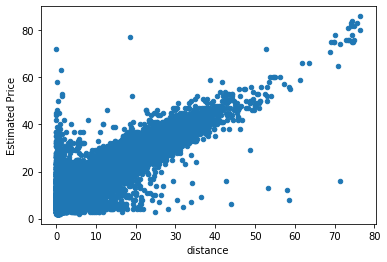

In [18]:
term.plot(kind='scatter', x='distance', y='Estimated Price')

Other fields don't seem to have a huge correlation with neither price, nor price/km.

Text(0.5, 1, 'Correlation matrix')

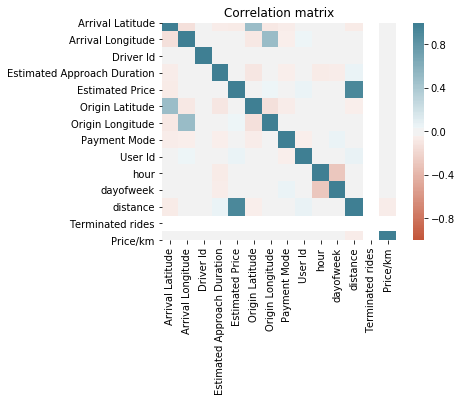

In [19]:
sns.heatmap(term.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True).set_title('Correlation matrix')

This absence of correlation is probably due to a high sensitivity of prices to demand, but I don't have data about demand to test this hypothesis. 

Though there is no clear pattern, on the following chart, we can observe interesting variations of price/km, probably due to punctual events having impact on supply and demand ratios (traffic jams, shows, strikes, storms...).

Text(0.5, 1, 'Price/km')

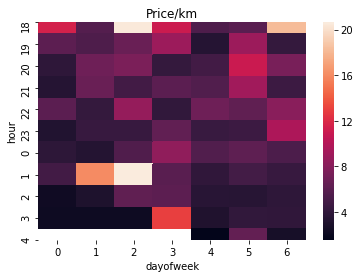

In [20]:
pricematrix = term.pivot_table(values='Price/km', index='hour', columns='dayofweek', aggfunc='mean').reindex([18,19,20,21,22,23,0,1,2,3,4])
sns.heatmap(pricematrix).set_title('Price/km')

### Can you create a flow matrix displaying the number of terminated rides for each Paris / suburban area pair?

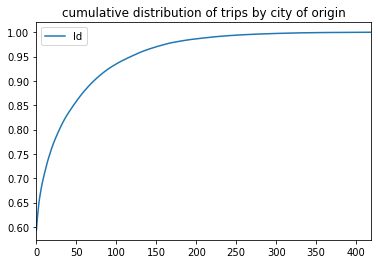

In [21]:
# top 30 cities account for 80% of the volumes
Topcities = term.pivot_table(values='Id', index='Origin City', aggfunc='count') \
    .sort_values('Id', ascending=0) \
    .reset_index() \
    .drop(['Origin City'], axis=1)
Topcities = Topcities.cumsum()/Topcities.cumsum().max()
Topcities.plot(title='cumulative distribution of trips by city of origin')

In [22]:
#keep top cities
topcities = df.groupby(['Origin City']).count().nlargest(30,'Id').index
term = term[term['Origin City'].isin(topcities)]
term = term[term['Arrival City'].isin(topcities)]

In [23]:
table = term.pivot_table(values='Payment Mode', index='Origin City', columns='Arrival City', aggfunc='count') \
    .sort_values(by=['Paris'], ascending=0, axis=1) \
    .sort_values(by=['Paris'], ascending=0, axis=0)
table

Arrival City,Paris,Boulogne-Billancourt,Saint-Denis,Clichy,Montreuil,Saint-Ouen,Courbevoie,Asnières-sur-Seine,Colombes,Neuilly-sur-Seine,...,Rueil-Malmaison,Villejuif,Saint-Cloud,Saint-Maur-des-Fossés,Versailles,Puteaux,Argenteuil,Champigny-sur-Marne,Bobigny,La Courneuve
Origin City,,,,,,,,,,,,,,,,,,,,,
Paris,33378.0,1260.0,1053.0,947.0,722.0,685.0,617.0,606.0,598.0,586.0,...,338.0,327.0,323.0,314.0,312.0,287.0,270.0,191.0,191.0,179.0
Clichy,805.0,37.0,57.0,87.0,12.0,56.0,20.0,43.0,41.0,13.0,...,9.0,4.0,8.0,1.0,7.0,12.0,18.0,2.0,6.0,10.0
Saint-Denis,763.0,12.0,229.0,46.0,22.0,73.0,13.0,32.0,24.0,7.0,...,12.0,6.0,4.0,5.0,9.0,5.0,34.0,7.0,24.0,37.0
Boulogne-Billancourt,700.0,94.0,15.0,21.0,6.0,11.0,19.0,24.0,16.0,25.0,...,14.0,2.0,40.0,1.0,32.0,19.0,9.0,2.0,NaN,NaN
Saint-Ouen,418.0,10.0,74.0,44.0,14.0,62.0,9.0,20.0,13.0,5.0,...,2.0,1.0,1.0,1.0,1.0,3.0,12.0,1.0,6.0,10.0
Neuilly-sur-Seine,408.0,19.0,6.0,19.0,5.0,9.0,49.0,27.0,29.0,63.0,...,10.0,2.0,14.0,NaN,10.0,16.0,4.0,1.0,1.0,NaN
Aubervilliers,408.0,3.0,69.0,21.0,23.0,40.0,9.0,16.0,12.0,3.0,...,1.0,2.0,3.0,6.0,7.0,5.0,7.0,2.0,31.0,26.0
Montreuil,406.0,3.0,16.0,13.0,83.0,13.0,4.0,3.0,7.0,2.0,...,2.0,4.0,8.0,1.0,2.0,2.0,3.0,5.0,7.0,4.0
Levallois-Perret,348.0,16.0,14.0,26.0,4.0,6.0,20.0,20.0,22.0,32.0,...,16.0,1.0,6.0,1.0,4.0,13.0,4.0,NaN,4.0,NaN


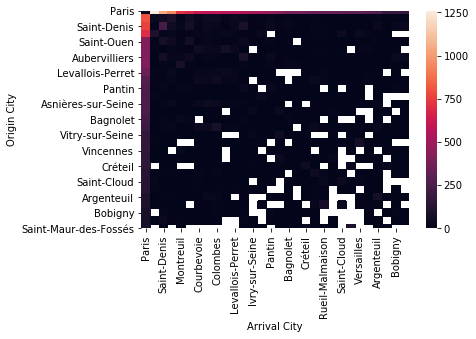

In [24]:
table['Paris']['Paris']=0 #remove intramuros Paris trips so that we can see something
sns.heatmap(table)

### Can you build a simple daily dashboard to monitor the activity in Paris? Please provide us with an example for a day of your choice in the extract.

Main hypothesis regarding the use case of those daily dashboards:
- Due to the inherent variability of daily data, it is hard to monitor clear improvements of the company's KPIs at the daily level. 
- At the daily level, I would rather monitor anomalies, to check for unexpected spikes or drops in key metrics

I would then provide the following charts:
- Finalization rate per hour (defined as the number of terminated rides divided by the number of initiated rides), for the teams in charge of the UX
- Price/km per hour, for the pricing team
- Average approach duration per hour, for the team in charge of supply
- Number of rides (with various splits), for all the above teams

### a - Data preparation

In [25]:
#reset dataset
term = df.loc[df['State'] == 5]
term = term.loc[term['Trips']!='nan, Paris']

In [26]:
#Data for plot 1
Finalization = df.pivot_table(values='Id', index=['dayofweek','hour'], columns='Terminated rides', aggfunc='count')
Finalization['finalization rate'] = Finalization[1]/(Finalization[1]+Finalization[0])
Finalization = Finalization.pivot_table(values='finalization rate', index=['hour'], columns='dayofweek', aggfunc='sum').fillna(0)
Finalization = Finalization.reindex([18,19,20,21,22,23,0,1,2,3,4])
Finalization['hour'] = Finalization.index
Finalization['hour'] = Finalization['hour'].apply(str)+'h'
Finalization = Finalization.set_index('hour')
Finalization['goal'] = Finalization.mean(numeric_only=True, axis=1)


In [27]:
#Data for plot 5
alltrips = term.pivot_table(values='Id', index='Trip Categories', columns='dayofweek', aggfunc='count')
alltrips['goal'] = alltrips[list(alltrips.columns)].mean(axis=1)
alltrips = alltrips.sort_values(by=3, ascending=1) \
    .drop([0,1,2,4,5,6], axis=1) \
    .fillna(0) \
    .astype(int)

In [28]:
#Data for plot 6
trips = term.pivot_table(values='Id', index='Trips', columns='dayofweek', aggfunc='count')
trips['goal'] = trips[list(trips.columns)].mean(axis=1)
trips = trips.sort_values(by=3, ascending=0) \
    .drop([0,1,2,4,5,6], axis=1) \
    .fillna(0) \
    .astype(int)
trips = trips.drop(['Paris']).head(25)

In [29]:
#function for other plots
def dashboard(values, title, aggfunc):
    plotdata = term.pivot_table(values=values, index='hour', columns='dayofweek', aggfunc=aggfunc).reindex([18,19,20,21,22,23,0,1,2,3,4])
    plotdata['hour'] = plotdata.index
    plotdata['hour'] = plotdata['hour'].apply(str)+'h'
    plotdata = plotdata.set_index('hour')
    plotdata['goal'] = plotdata.mean(numeric_only=True, axis=1)
    
    fig, ax = plt.subplots()
    plotdata.plot(y=3, style='m-',  label='Today', ax=ax)
    plotdata.plot(y='goal', style='k:', ax=ax, title=title, figsize=(7.2,4))

### b - Plots

_N.B.: the goals are placeholders, not actual goals._

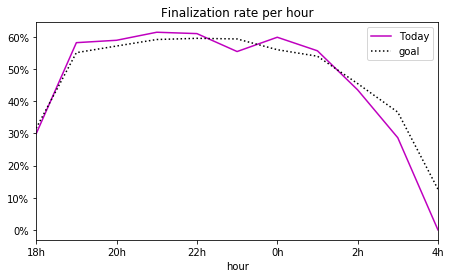

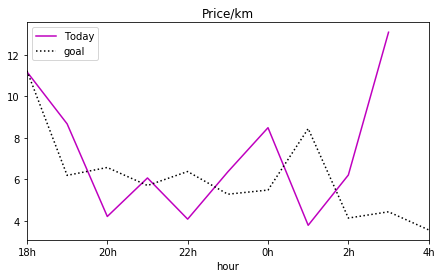

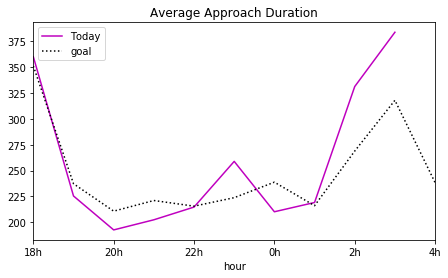

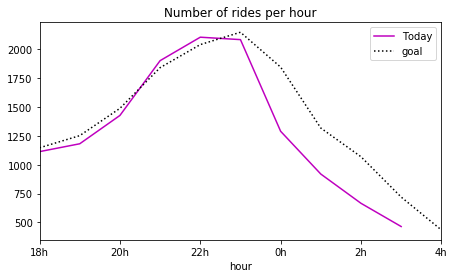

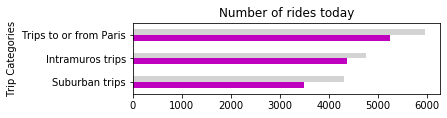

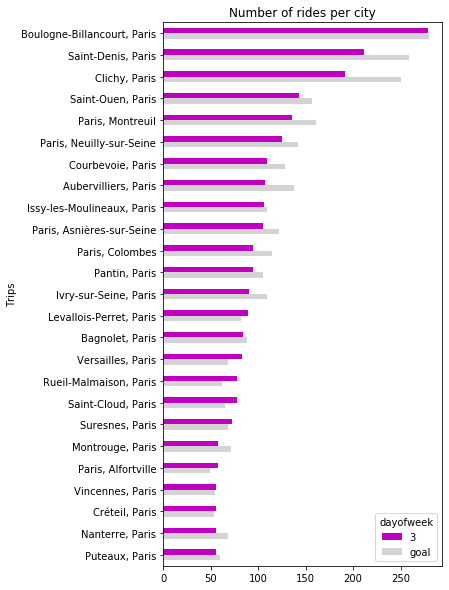

In [30]:
#Plot 1
fig, ax = plt.subplots()
Finalization.plot(y=3, style='m-',  label='Today', ax=ax)
Finalization.plot(y='goal', style='k:', ax=ax, title='Finalization rate per hour', figsize=(7.2,4))
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

#Plot 2,3,4
dashboard(values='Price/km',title='Price/km', aggfunc='mean')
dashboard(values='Estimated Approach Duration',title='Average Approach Duration', aggfunc='mean')
dashboard(values='Id',title='Number of rides per hour', aggfunc='count')
#Those 2 charts doesn't see to bring additional value vs. the number of rides per hour:
#dashboard(values='User Id',title='Number of active users', aggfunc='nunique') 
#dashboard(values='Driver Id',title='Number of active drivers', aggfunc='nunique')

#Plot 5
alltrips.plot.barh(figsize=(5.5,1.3), color=['m', 'lightgray'], title='Number of rides today', legend=0)

#Plot 6
trips.plot.barh(figsize=(5,10), color=['m', 'lightgray'], title='Number of rides per city')
plt.gca().invert_yaxis()

# 3 - Product Analytics

We focus on the conversion rate (defined as the share of users that end up ordering a ride after having opened the app). This is a useful indicator to measure the efficiency of our UX/UI.

Let’s say we currently track these two events:
- «user opened the app»
- «user ordered a ride»

Let’s also assume that we currently have a conversion rate of 50% based on the above, and that we want to reach the 90% objective we have set to ourselves.

### How would you proceed to reach this goal, considering both the UX/UI and analytical fronts?

I would follow a classic approach:
1. Phase 1 - Find the biggest issues
2. Phase 2 - Update and prioritize the feature roadmap / experiment plan
3. Phase 3 - Implement the features
4. Phase 4 - Analyse learnings and iterate

On the data side, Phase 1 would involve the following tasks (to be prioritised based on complexity vs. expected results):
- **Implementation of more granular tracking of each substep**. Heetch only tracks step (0) «user opened the app» and step (6) «user ordered a ride». It would be very useful to track more granular steps in between: (1) user has to login/register (2) user finds departure address (3) user get an acceptable approach duration (4) user finds arrival address (5) user get an acceptable price. With those events, we could split the conversion rate between each step, and find where are the biggest conversion drops. In my opinion, this analysis is the best starting point, as it will help choose in which direction we should invest our time.
- **Cleaning data tasks**: remove users who completed another use-case during their visit (e.g. invite a friend, check a payment, check their profile...) / remove low-quality traffic sources bringing heavy volumes of "curious" users / check session parameters and, if relevant, remove users who left the app and logged again in the next 60min... 
- **Analysis of the main variables that could have an impact on conversion rate**: price, demand, supply, time of day, day of year, city/address...  
- **Analysis of the behaviour of different user segments**: frequent vs. occasional users, price sensitive vs. insensitives users, young vs. old users... 
- **Analysis of technical issues logs**

On the PM/UX design side, Phase 1 should involve:
- **User research** (interview with users, if possible, and with internal team members: support, marketing, tech)
- **Analysis of user feedbacks** related to this step
- **Benchmark of competitors features** (e.g. "Uber's favorite rides") 

Further phases (2, 3, 4) are harder to detail at this stage, as they depend on the results of phase 1!